## Conv1D를 활용한 의도(intent) 분류

- 의도(intent) 분류 모델 생성   
- intent 텍스트 분류  
- 6개의 label 값으로 구성    
- 사전 훈련된 워드 임베딩 glove.6B.100d.txt 사용 
- intent_train_data.csv
- intent_test_data.csv

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_train_data.csv", filename="./data/intent_train_data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_test_data.csv", filename="./data/intent_test_data.csv")

('./data/intent_train_data.csv', <http.client.HTTPMessage at 0x1f674f56930>)

('./data/intent_test_data.csv', <http.client.HTTPMessage at 0x1f674f54410>)

In [3]:
import pandas as pd
df_train =  pd.read_csv('./data/intent_train_data.csv')
df_test =  pd.read_csv('./data/intent_test_data.csv')

In [4]:
df_train.head()
df_train.tail()

,intent,label
0,add another song to the cita rom ntica playlist,AddToPlaylist
1,add clem burke in my playlist pre party r b jams,AddToPlaylist
2,add live from aragon ballroom to trapeo,AddToPlaylist
3,add unite and win to my night out,AddToPlaylist
4,add track to my digster future hits,AddToPlaylist


,intent,label
11779,can a i get the movie schedule for sympathy fo...,SearchScreeningEvent
11780,find movie schedules for animated movies aroun...,SearchScreeningEvent
11781,what time is bordertown trail showing,SearchScreeningEvent
11782,in the neighbourhood find movies with movie times,SearchScreeningEvent
11783,what cinema has the closest movies,SearchScreeningEvent


In [9]:
# 데이터 섞어주기 >> index reset해서 다시 구성
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11784 entries, 0 to 11783
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   intent  11784 non-null  object
 1   label   11784 non-null  object
dtypes: object(2)
memory usage: 184.3+ KB


In [11]:
df_train.head()

,intent,label
0,do you know of a song by the mande studies ass...,SearchCreativeWork
1,add global underground 006 sydney to my best m...,AddToPlaylist
2,put this artist onto the chillin' on a dirt ro...,AddToPlaylist
3,find three in the attic,SearchScreeningEvent
4,find the closest cinema playing the st francis...,SearchScreeningEvent


In [12]:
len(df_train)

11784

In [17]:
print('intent열의 유니크한 값 :', df_train['intent'].nunique())
df_train.drop_duplicates(subset=['intent'], inplace=True)
print('총 샘플의 수 :', len(df_train))

intent열의 유니크한 값 : 11580
총 샘플의 수 : 11580


In [13]:
len(df_test)

600

In [14]:
print('intent열의 유니크한 값 :', df_test['intent'].nunique())
df_test.drop_duplicates(subset=['intent'], inplace=True)
print('총 샘플의 수 :', len(df_test))

intent열의 유니크한 값 : 595
총 샘플의 수 : 595


In [16]:
# label 카테고리 확인
df_train["label"].value_counts()

label
GetWeather              2000
BookRestaurant          1973
SearchScreeningEvent    1959
RateBook                1956
SearchCreativeWork      1954
AddToPlaylist           1942
Name: count, dtype: int64

,intent,label,label_,cleaned
0,do you know of a song by the mande studies ass...,SearchCreativeWork,4,know song mande studies association
1,add global underground 006 sydney to my best m...,AddToPlaylist,0,add global underground sydney best metal new m...
2,put this artist onto the chillin' on a dirt ro...,AddToPlaylist,0,put artist onto chillin dirt road playlist
3,find three in the attic,SearchScreeningEvent,5,find three attic
4,find the closest cinema playing the st francis...,SearchScreeningEvent,5,find closest cinema playing st francisville ex...


,intent,label,label_,cleaned
11779,add boyce and hart to urban hits playlist,AddToPlaylist,0,add boyce hart urban hits playlist
11780,what is the weather forecast for israel,GetWeather,2,weather forecast israel
11781,will it be hot in new york on october the 1st ...,GetWeather,2,hot new york october st
11782,i want to play the game the carny,SearchCreativeWork,4,want play game carny
11783,read the novel friend the great legacy,SearchCreativeWork,4,read novel friend great legacy


label_
2    2000
1    1973
5    1959
3    1956
4    1954
0    1942
Name: count, dtype: int64

<Axes: xlabel='label_'>

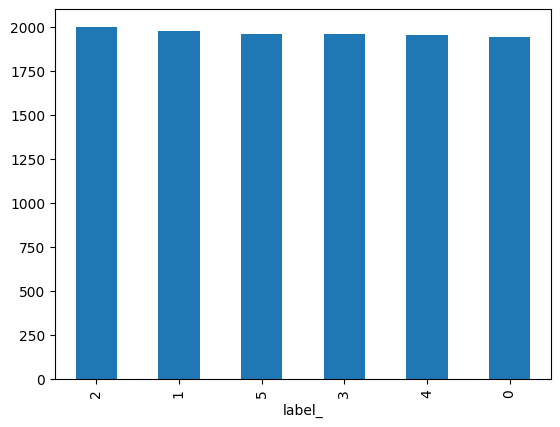

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train["label_"] = encoder.fit_transform(df_train["label"])

df_train.head()
df_train.tail()
df_train['label_'].value_counts()
df_train['label_'].value_counts().plot(kind='bar')


In [38]:
encoder.classes_

array(['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'RateBook',
       'SearchCreativeWork', 'SearchScreeningEvent'], dtype=object)

In [39]:
# 각 label별 label_ 확인
category = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(category)

{'AddToPlaylist': 0, 'BookRestaurant': 1, 'GetWeather': 2, 'RateBook': 3, 'SearchCreativeWork': 4, 'SearchScreeningEvent': 5}


,intent,label,label_,cleaned
0,add the album to the might and myth power meta...,AddToPlaylist,0,add album might myth power metal playlist
1,add jack white to my playlist this is shakira,AddToPlaylist,0,add jack white playlist shakira
2,add andy hunter to my evening commute playlist,AddToPlaylist,0,add andy hunter evening commute playlist
3,book a reservation for 1 at a diner in wi,BookRestaurant,1,book reservation diner wi
4,what is the overcast forecast for the current ...,GetWeather,2,overcast forecast current position starting jul


,intent,label,label_,cleaned
595,what is the forecast for lansford for temperat...,GetWeather,2,forecast lansford temperate weather
596,what movies are playing close by,SearchScreeningEvent,5,movies playing close
597,can you find me the national anthem of the anc...,SearchCreativeWork,4,find national anthem ancient britons televisio...
598,wish to see the photograph with the name live ...,SearchCreativeWork,4,wish see photograph name live right
599,will it be colder here in 48 and a half weeks,GetWeather,2,colder half weeks


label_
0    100
1    100
4    100
2     99
5     98
3     98
Name: count, dtype: int64

<Axes: xlabel='label_'>

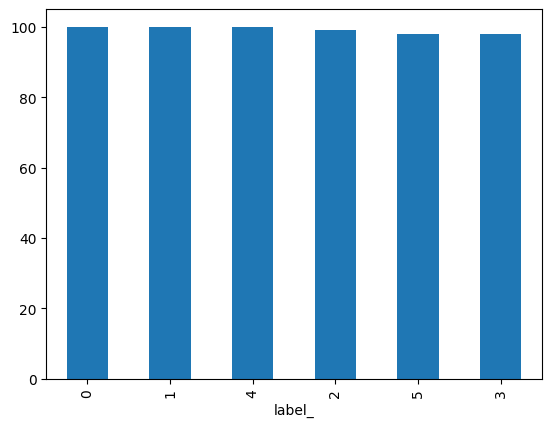

In [40]:
# test 데이터도 동일하게 변환
# encoder는 학습데이터에서 사용했던 객체 그대로 사용

df_test['label_'] = encoder.fit_transform(df_test['label'])
df_test.head()
df_test.tail()
df_test['label_'].value_counts()
df_test['label_'].value_counts().plot(kind='bar')



In [41]:
# 영문 전처리 진행
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128) # chr(128) : '\x80'

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [42]:
df_train['cleaned'] = df_train['intent'].apply(_removeNonAscii)
df_train['cleaned'] = df_train.cleaned.apply(make_lower_case)
df_train['cleaned'] = df_train.cleaned.apply(remove_stop_words)
df_train['cleaned'] = df_train.cleaned.apply(remove_punctuation)
df_train['cleaned'] = df_train.cleaned.apply(remove_html)

df_test['cleaned'] = df_test['intent'].apply(_removeNonAscii)
df_test['cleaned'] = df_test.cleaned.apply(make_lower_case)
df_test['cleaned'] = df_test.cleaned.apply(remove_stop_words)
df_test['cleaned'] = df_test.cleaned.apply(remove_punctuation)
df_test['cleaned'] = df_test.cleaned.apply(remove_html)

In [43]:
df_train.head()

,intent,label,label_,cleaned
0,do you know of a song by the mande studies ass...,SearchCreativeWork,4,know song mande studies association
1,add global underground 006 sydney to my best m...,AddToPlaylist,0,add global underground sydney best metal new m...
2,put this artist onto the chillin' on a dirt ro...,AddToPlaylist,0,put artist onto chillin dirt road playlist
3,find three in the attic,SearchScreeningEvent,5,find three attic
4,find the closest cinema playing the st francis...,SearchScreeningEvent,5,find closest cinema playing st francisville ex...


In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train["cleaned"])
X_train_encoded = tokenizer.texts_to_sequences(df_train["cleaned"])

In [45]:
print(X_train_encoded[:5])

[[170, 32, 3745, 1760, 1761], [2, 718, 1384, 3746, 75, 121, 70, 1762], [37, 65, 97, 1385, 884, 246, 4], [3, 39, 1147], [3, 66, 50, 16, 185, 3747, 1386]]


In [46]:
print(tokenizer.word_index)

{'book': 1, 'add': 2, 'find': 3, 'playlist': 4, 'movie': 5, 'rate': 6, 'weather': 7, 'show': 8, 'give': 9, 'restaurant': 10, 'current': 11, 'stars': 12, 'forecast': 13, 'points': 14, 's': 15, 'playing': 16, 'table': 17, 'want': 18, 'like': 19, 'movies': 20, 'album': 21, 'need': 22, 'called': 23, 'one': 24, 'schedule': 25, 'theatres': 26, 'd': 27, 'please': 28, 'house': 29, 'four': 30, 'time': 31, 'song': 32, 'reservation': 33, 'novel': 34, 'get': 35, 'rating': 36, 'put': 37, 'two': 38, 'three': 39, 'people': 40, 'animated': 41, 'five': 42, 'times': 43, 'schedules': 44, 'films': 45, 'tune': 46, 'party': 47, 'saga': 48, 'tv': 49, 'cinema': 50, 'series': 51, 'serves': 52, 'essay': 53, 'track': 54, 'game': 55, 'see': 56, 'textbook': 57, 'area': 58, 'nearest': 59, 'close': 60, 'list': 61, 'zero': 62, 'showing': 63, 'spot': 64, 'artist': 65, 'closest': 66, 'theatre': 67, 'tell': 68, 'rated': 69, 'new': 70, 'going': 71, 'would': 72, 'play': 73, 'park': 74, 'best': 75, 'watch': 76, 'pm': 77, '

In [47]:
vocab_size = len(tokenizer.word_index)+1
print('단어 집합의 크기:', vocab_size)

단어 집합의 크기: 9523


intent의 최대 길이 : 22
intent의 평균 길이 :  5.271300067888663


(array([3.100e+01, 0.000e+00, 4.340e+02, 0.000e+00, 1.456e+03, 0.000e+00,
        0.000e+00, 2.408e+03, 0.000e+00, 2.699e+03, 0.000e+00, 2.140e+03,
        0.000e+00, 0.000e+00, 1.272e+03, 0.000e+00, 7.260e+02, 0.000e+00,
        0.000e+00, 3.020e+02, 0.000e+00, 1.560e+02, 0.000e+00, 9.500e+01,
        0.000e+00, 0.000e+00, 3.100e+01, 0.000e+00, 2.100e+01, 0.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  1.42,  1.84,  2.26,  2.68,  3.1 ,  3.52,  3.94,  4.36,
         4.78,  5.2 ,  5.62,  6.04,  6.46,  6.88,  7.3 ,  7.72,  8.14,
         8.56,  8.98,  9.4 ,  9.82, 10.24, 10.66, 11.08, 11.5 , 11.92,
        12.34, 12.76, 13.18, 13.6 , 14.02, 14.44, 14.86, 15.28, 15.7 ,
        16.12, 16.54, 16.96, 17.38, 17.8 , 18.22, 18.64, 19.06, 19.48,
        19.9 , 20.32,

Text(0.5, 1.0, 'Train data')

Text(0.5, 0, 'length of samples')

Text(0, 0.5, 'number of samples')

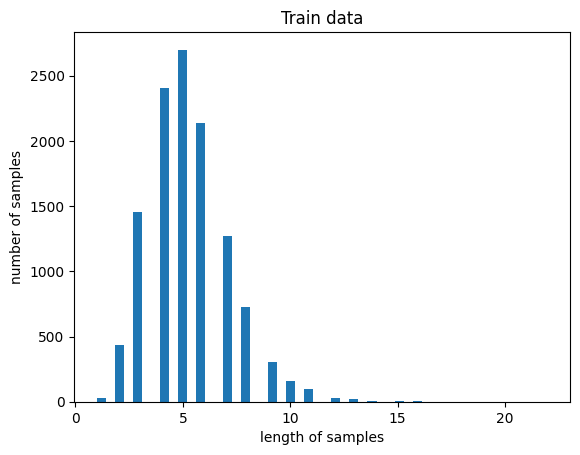

In [48]:
import matplotlib.pyplot as plt
print('intent의 최대 길이 :', max(len(l) for l in X_train_encoded))
print('intent의 평균 길이 : ', (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(s) for s in X_train_encoded], bins=50)
plt.title('Train data')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [49]:
max_len = max(len(seq) for seq in X_train_encoded)
max_len

22

In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(X_train_encoded, maxlen=max_len)
print("학습 데이터의 크기(shape): ", X_train_padded.shape)

학습 데이터의 크기(shape):  (11784, 22)


In [51]:
X_test_encoded = tokenizer.texts_to_sequences(df_test['cleaned'])
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)

intent의 최대 길이 : 12
intent의 평균 길이 :  4.756302521008403


(array([  5.,   0.,   0.,   0.,  31.,   0.,   0.,   0.,   0., 110.,   0.,
          0.,   0., 135.,   0.,   0.,   0.,   0., 140.,   0.,   0.,   0.,
         96.,   0.,   0.,   0.,   0.,  39.,   0.,   0.,   0.,  18.,   0.,
          0.,   0.,   0.,  14.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  1.22,  1.44,  1.66,  1.88,  2.1 ,  2.32,  2.54,  2.76,
         2.98,  3.2 ,  3.42,  3.64,  3.86,  4.08,  4.3 ,  4.52,  4.74,
         4.96,  5.18,  5.4 ,  5.62,  5.84,  6.06,  6.28,  6.5 ,  6.72,
         6.94,  7.16,  7.38,  7.6 ,  7.82,  8.04,  8.26,  8.48,  8.7 ,
         8.92,  9.14,  9.36,  9.58,  9.8 , 10.02, 10.24, 10.46, 10.68,
        10.9 , 11.12, 11.34, 11.56, 11.78, 12.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'Test data')

Text(0.5, 0, 'length of samples')

Text(0, 0.5, 'number of samples')

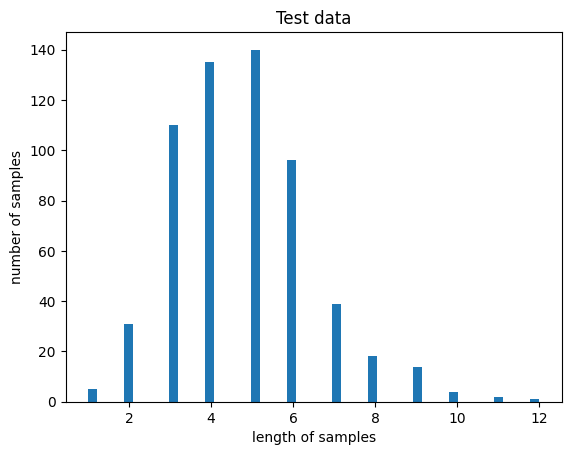

In [52]:
import matplotlib.pyplot as plt
print('intent의 최대 길이 :', max(len(l) for l in X_test_encoded))
print('intent의 평균 길이 : ', (sum(map(len, X_test_encoded))/len(X_test_encoded)))
plt.hist([len(s) for s in X_test_encoded], bins=50)
plt.title('Test data')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [53]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train["label_"], num_classes=6)
z = to_categorical(df_test["label_"], num_classes=6)

In [55]:
len(y)
len(z)

11784

595

In [56]:
from sklearn.model_selection import train_test_split

features = X_train_padded
target = y

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, 
                                                    random_state=0, stratify=target)


In [57]:
X_train_padded.shape
target.shape
X_train.shape
y_train.shape
X_val.shape
y_val.shape

(11784, 22)

(11784, 6)

(9427, 22)

(9427, 6)

(2357, 22)

(2357, 6)

In [58]:
#  사전학습 임베딩 DATA DICT 형태로 변환
import numpy as np
embedding_dict= dict()

f = open("./data/0307/glove.6B.100d.txt", encoding="utf8")
for line in f :
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.array(word_vector[1:], dtype="float32")
    embedding_dict[word]=word_vector_arr
f.close()

print(f'Embedding vector : {len(embedding_dict)} 개')

Embedding vector : 400000 개


In [60]:
# book 단어 임베딩확인
len(embedding_dict["book"])

100

- 학습데이터 사전학습된 임베딩 벡터로 매핑

In [61]:
tokenizer.word_index["book"]

1

In [65]:
# 1) 학습데이터 단어 수 만큼 밀집벡터 행렬 생성(크기 : vocab_size * 100)
vocab_size
embedding_matrix = np.zeros((vocab_size, 100))
embedding_matrix.shape
# X_train

9523

(9523, 100)

In [66]:
# 2) 사전학습 임베딩 dict에서 학습데이터 단어 찾아 반환하는 함수(없으면 None 반환)
def get_vectors(word):
    if word in embedding_dict :
        return embedding_dict[word]
    else:
        None

In [68]:
embedding_matrix[1] = get_vectors("book")

In [70]:
# 3) 학습데이터 단어사전의 각 단어 2번 함수 활용 임베딩벡터 찾고 1번에서 준비한 밀집벡터행렬에 저장
for word, index in tokenizer.word_index.items() :
    vect_value = get_vectors(word)
    if vect_value is not None :
        embedding_matrix[index] = vect_value

In [71]:
embedding_matrix[1]

array([-1.97439998e-01,  4.48309988e-01,  1.36889994e-01, -1.55949995e-01,
        9.35999990e-01,  7.29860008e-01,  3.40990007e-01, -3.38959992e-01,
       -8.95690024e-02, -4.77059990e-01,  3.51119995e-01, -4.21979994e-01,
       -1.22210003e-01, -6.33750036e-02, -4.58200008e-01,  7.87230015e-01,
        9.40450013e-01,  8.11010003e-02, -2.32240006e-01,  4.07779992e-01,
        3.32580000e-01, -4.44579989e-01, -4.71170008e-01,  1.48519993e-01,
        9.63079989e-01, -6.52669966e-02, -5.36610000e-02, -6.74740016e-01,
       -4.23640013e-01,  9.43920016e-02, -3.86680007e-01,  1.82370007e-01,
       -1.28460005e-01, -2.19520003e-01, -5.89929998e-01,  7.36020029e-01,
       -2.40089998e-01,  3.23920012e-01, -2.46629998e-01, -4.06839997e-01,
       -5.24680018e-01,  4.61739987e-01, -1.49360001e-01, -1.19989999e-01,
       -1.39899999e-01, -4.49440002e-01, -2.65650004e-01, -7.00609982e-01,
        3.01880002e-01, -1.12089999e-01,  6.63230002e-01,  3.96979988e-01,
        6.91579998e-01,  

In [72]:
embedding_dict["book"]

array([-1.9744e-01,  4.4831e-01,  1.3689e-01, -1.5595e-01,  9.3600e-01,
        7.2986e-01,  3.4099e-01, -3.3896e-01, -8.9569e-02, -4.7706e-01,
        3.5112e-01, -4.2198e-01, -1.2221e-01, -6.3375e-02, -4.5820e-01,
        7.8723e-01,  9.4045e-01,  8.1101e-02, -2.3224e-01,  4.0778e-01,
        3.3258e-01, -4.4458e-01, -4.7117e-01,  1.4852e-01,  9.6308e-01,
       -6.5267e-02, -5.3661e-02, -6.7474e-01, -4.2364e-01,  9.4392e-02,
       -3.8668e-01,  1.8237e-01, -1.2846e-01, -2.1952e-01, -5.8993e-01,
        7.3602e-01, -2.4009e-01,  3.2392e-01, -2.4663e-01, -4.0684e-01,
       -5.2468e-01,  4.6174e-01, -1.4936e-01, -1.1999e-01, -1.3990e-01,
       -4.4944e-01, -2.6565e-01, -7.0061e-01,  3.0188e-01, -1.1209e-01,
        6.6323e-01,  3.9698e-01,  6.9158e-01,  8.3442e-01, -5.2717e-01,
       -2.5314e+00,  1.3281e-01,  3.0253e-01,  1.1062e+00,  7.2221e-03,
        2.6031e-01,  1.1584e+00, -7.9330e-02, -7.6659e-01,  1.2623e+00,
       -6.2071e-01,  5.9821e-01,  7.3539e-01,  3.8573e-01, -4.02

In [77]:
# 모델 생성 및 컴파일
dropout_rate = 0.3
num_filters = 32
embedding_dim = 100
kernel_size = 5
activation = 'relu'
optimizer = 'adam'
batch_size = 32
epochs = 10
validation_split = 0.2

In [78]:
# 학습 설정
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
        Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=True),
        Dropout(dropout_rate),
        Conv1D(filters=num_filters, kernel_size=kernel_size, padding="valid", activation=activation),
        GlobalMaxPooling1D(),
        Dropout(dropout_rate),
        Dense(6, activation="softmax")
])
model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=["acc"])

early_stopping_callback = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
check_pointer = ModelCheckpoint("./model/best_model_intent.keras", save_best_only=True, monitor="val_loss", verbose=1)

In [79]:
# 학습
model.fit(
    X_train, y_train,
    validation_split=validation_split,
    epochs=epochs,
    batch_size = batch_size,
    callbacks=[early_stopping_callback, check_pointer]
)

Epoch 1/10
231/236 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5683 - loss: 1.2687
Epoch 1: val_loss improved from inf to 0.20151, saving model to ./model/best_model_intent.keras
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.5728 - loss: 1.2562 - val_acc: 0.9618 - val_loss: 0.2015
Epoch 2/10
229/236 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9257 - loss: 0.2668 
Epoch 2: val_loss improved from 0.20151 to 0.10255, saving model to ./model/best_model_intent.keras
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.9259 - loss: 0.2658 - val_acc: 0.9788 - val_loss: 0.1026
Epoch 3/10
233/236 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9577 - loss: 0.1515
Epoch 3: val_loss improved from 0.10255 to 0.07377, saving model to ./model/best_model_intent.keras
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9578 - loss: 0.1512 - val_acc: 0.9841 - val_loss: 0.0738
Epoch 4/10
235/236 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9687 - loss: 0.1048
Epoch 4: val_loss improved from 0.07377 to 0.05691, saving

In [81]:
loss, accuracy = model.evaluate(X_test_padded, z)
print("테스트 데이터 정확도")
print(f'Loss: {loss}, Accuracy: {accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9884 - loss: 0.0264     
테스트 데이터 정확도
Loss: 0.03229399770498276, Accuracy: 0.9865546226501465


In [84]:
y_val

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [85]:
from sklearn.metrics import accuracy_score

val_pred = model.predict(X_val)
y_val_label = np.argmax(y_val, axis=1)
val_pred_label = np.argmax(val_pred, axis=1)
print("검증 데이터 정확도:", accuracy_score(y_val_label, val_pred_label))

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
검증 데이터 정확도: 0.9804836656767076


In [93]:
history= model.fit(X_train, y_train,
                  epochs = 20, batch_size=512,
                  validation_data=(X_val, y_val))

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9900 - loss: 0.0368 - val_acc: 0.9805 - val_loss: 0.0566
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9928 - loss: 0.0307 - val_acc: 0.9809 - val_loss: 0.0560
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.9904 - loss: 0.0388 - val_acc: 0.9818 - val_loss: 0.0554
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9895 - loss: 0.0332 - val_acc: 0.9818 - val_loss: 0.0551
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9927 - loss: 0.0334 - val_acc: 0.9818 - val_loss: 0.0550
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.9904 - loss: 0.0374 - val_acc: 0.9809 - val_loss: 0.0548
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9902 - loss: 0.0357 - val_acc: 0.9818 - val_loss: 0.0546
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9939 - loss: 0.0276 - val_acc: 0.9822 - val_loss: 0.0543
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.9931

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

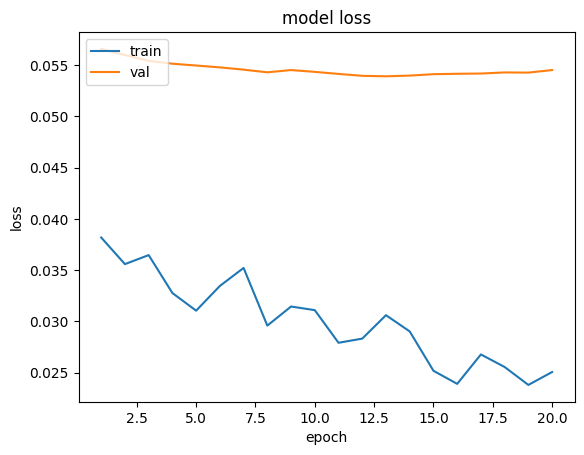

In [94]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'acc')

Text(0.5, 0, 'epoch')

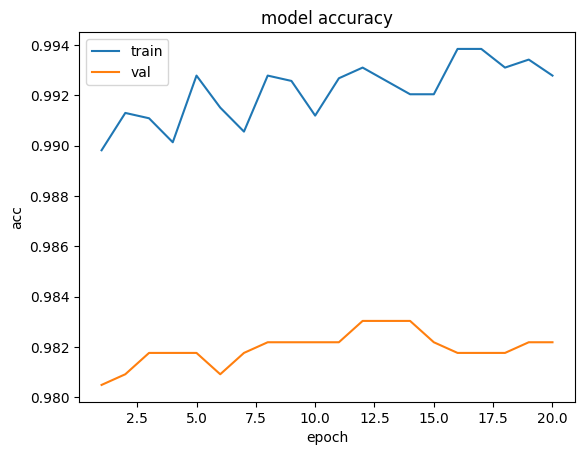

In [95]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [298]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 22, 100)             │         952,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 18, 32)              │          16,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,906,192 (11.09 MB)

 Trainable params: 968,730 (3.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,937,462 (7.39 MB)